$P_A (n + 1) = \{ 1 + c\Delta t [ P_m - P_A(n)]\}P_A(n)$

In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math

sns.set_theme(style="darkgrid")
sns.set(rc={"figure.figsize":(15, 8)}) #width=3, #height=4

In [2]:
delta_t = 1 # years
n = 100
c = 1.25e-9
Pm = 25e6


time_grid_1 = np.array([i*delta_t for i in range(n + 1)], dtype=float)
P_A = np.zeros(n + 1, dtype=np.longlong)

P_obs = np.array([3.0000e6, 3.9161e6, 5.0493e6, 6.4129e6, 8.0003e6, 9.7778e6, 11.6834e6, 13.6325e6, 15.5321e6, 17.2976e6, 18.8671e6, 20.2076e6, 21.3139e6, 22.2012e6], dtype=np.double)

P_A[0] = 3e6

# Вычисление P(t)

In [3]:
x_grid = np.array([i*delta_t for i in range(n + 1)], dtype=float)
Pt = np.zeros(x_grid.shape[0], dtype=np.double) # P(t)
Pt[0] = 3e6

for i in range(1, x_grid.shape[0]):
    Pt[i] = Pm * Pt[0] / (Pt[0] + (Pm - Pt[0]) * np.exp((-c) * Pm * x_grid[i]))
    

# Вычисление P_A

In [4]:
def Pn (P_prev: np.double) -> np.double:
    
    return (1 + c * delta_t * (Pm - P_prev))* P_prev

In [5]:
for i in range(0, len(time_grid_1) - 1, 1):
    P_A[i + 1] = Pn(P_A[i])

# Построение графиков

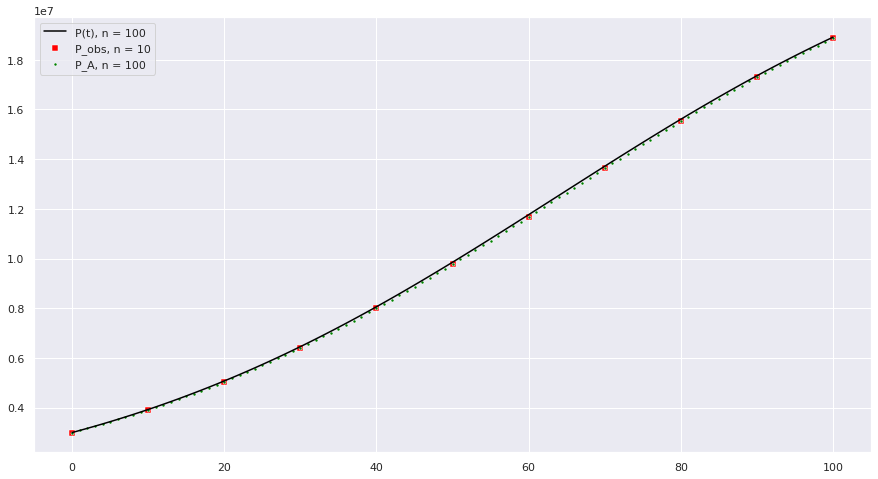

In [6]:
# plots

sns.lineplot(x = x_grid, y = Pt, color="black")
sns.scatterplot(x = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100], y = P_obs[:11], color="red", marker="s")
sns.scatterplot(x = time_grid_1, y = P_A, color="green", marker=".")

plt.legend(['P(t), n = {}'.format(n), 'P_obs, n = 10', 'P_A, n = {}'.format(n)])
plt.show()

# New task classwork

In [7]:
m = (int)(200.0 / delta_t) 

time_grid_2 = np.array([i*delta_t for i in range(m)], dtype=float)

P_0 = np.array([5e6 * i for i in range(1, 11, 1)], dtype=np.longlong)

In [8]:
P_matrix = np.zeros((P_0.shape[0], time_grid_2.shape[0]), dtype=np.longlong)

for i in range(P_0.shape[0]):
    P_matrix[i][0] = P_0[i]

In [9]:
for i in range(P_matrix.shape[0]):
    for j in range(P_matrix.shape[1] - 1):
        P_matrix[i][j + 1] = Pn(P_matrix[i][j])
        

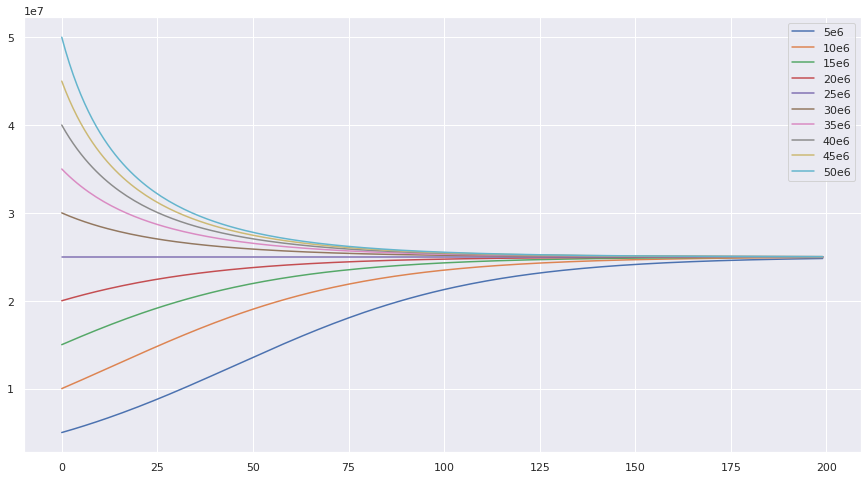

In [10]:
for i in range(P_matrix.shape[0]):
    sns.lineplot(x = time_grid_2, y = P_matrix[i])

plt.legend(['5e6', '10e6', '15e6', '20e6', '25e6', '30e6', '35e6', '40e6', '45e6', '50e6'], loc = 'upper right')
plt.show()

# Уточнение Домашнее задание 

$\frac{d}{dt}P(t)\bigg|_{t=n\Delta t} \approx \frac{P_A(n + 1) - P_A(n - 1)}{2\Delta t}$

In [11]:
dP_left = np.zeros(P_A.shape[0] - 1, dtype=np.longlong)
dP_right = np.zeros(P_A.shape[0] - 1, dtype=np.longlong)

In [12]:
for i in range(1, P_A.shape[0] - 1, 1):
    dP_left[i] = (P_A[i + 1] - P_A[i - 1]) / (2*delta_t)

In [13]:
for i in range(1, P_A.shape[0] - 1, 1):
    dP_right[i] = c * P_A[i]*(Pm - P_A[i])

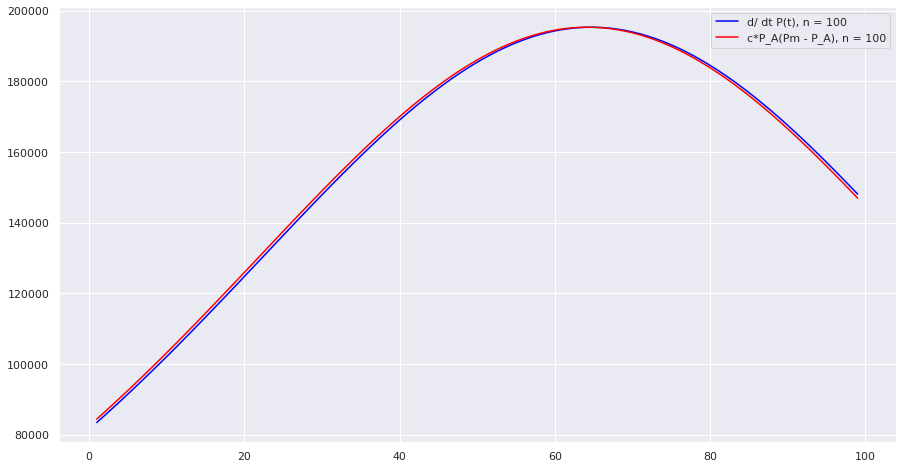

In [14]:
sns.lineplot(x = time_grid_1[1:dP_left.shape[0]], y = dP_left[1:], color = "blue")
sns.lineplot(x = time_grid_1[1:dP_right.shape[0]], y = dP_right[1:], color = "red")
plt.legend(['d/ dt P(t), n = {}'.format(n), 'c*P_A(Pm - P_A), n = {}'.format(n)])
plt.show()